### Problem Statement

You are a data scientist / AI engineer working on a binary classification problem. You have been provided with a dataset named **`"mushroom_classification.csv"`**, which includes various features of mushrooms to predict whether they are edible or poisonous. The dataset comprises the following columns:

- `cap_diameter:` The diameter of the mushroom cap.
- `cap_shape:` The shape of the mushroom cap, encoded as integers.
- `gill_attachment:` The attachment of the gills, encoded as integers.
- `gill_color:` The color of the gills, encoded as integers.
- `stem_height:` The height of the mushroom stem.
- `stem_width` The width of the mushroom stem.
- `stem_color:` The color of the mushroom stem, encoded as integers.
- `season:` The season when the mushroom was found, encoded as integers.
- `class:` The classification of the mushroom, where 0 indicates edible and 1 indicates poisonous.

Your task is to use this dataset to build and evaluate a binary classification model to classify mushrooms as edible or poisonous. You will start with basic models and gradually move towards advanced models like Gradient Boosting. Finally, you will explore various parameters of the Gradient Boosting model to enhance performance.

**Dataset credits:** Prisha Sawhney (https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset/data)

**Import Necessary Libraries**

In [1]:
#import necessary libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Task 1: Data Preparation and Exploration

1. Import the data from the `"mushroom_classification.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.

In [2]:
# Step 1: Import the data from the "mushroom_classification.csv" file and store it in a variable 'df'

df = pd.read_csv("mushroom_classification.csv")

In [3]:
# Step 2: Display the number of rows and columns in the dataset

df.shape

(54035, 9)

In [4]:
# Step 3: Display the first few rows of the dataset to get an overview

df.head()

,cap_diameter,cap_shape,gill_attachment,gill_color,stem_height,stem_width,stem_color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


### Task 2: Exploratory Data Analysis (EDA)

1. Perform a group-by operation on the target class and calculate the mean of the following features: `cap_diameter, stem_height, and stem_width`.
2. Visualize the distribution of these features using box plots.

In [5]:
# Step 1: Perform a group-by operation on the target class and calculate the mean of specific features

features_to_analyze = ['cap_diameter', 'stem_height','stem_width']
grouped = df.groupby('class')[features_to_analyze].mean()
print(grouped)

       cap_diameter  stem_height   stem_width
class                                        
0        633.064696     0.627374  1208.915189
1        513.236293     0.867251   921.516563


<Figure size 1200x600 with 0 Axes>

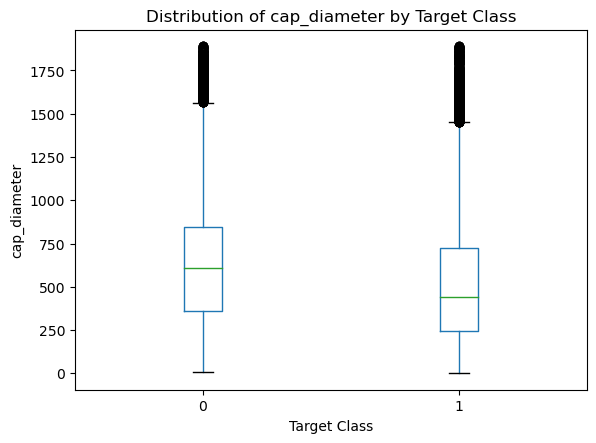

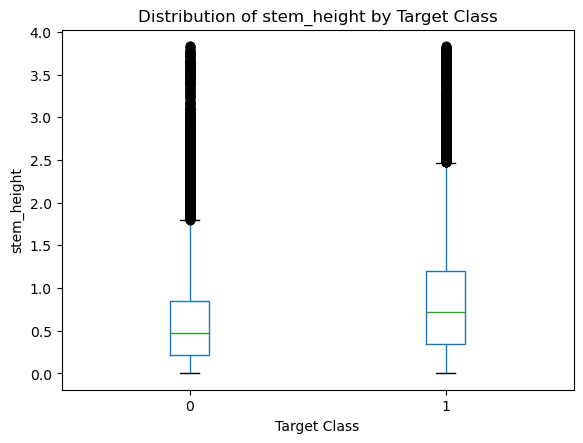

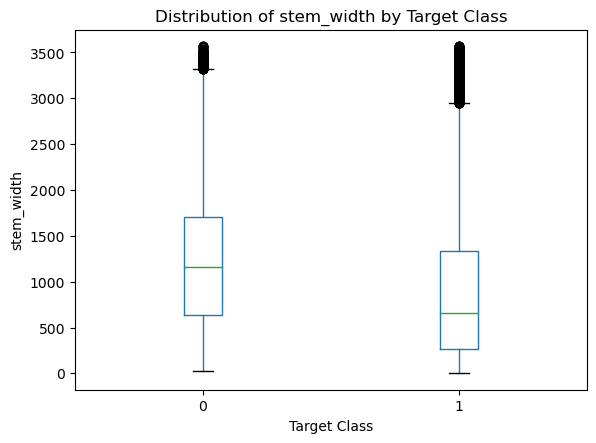

In [13]:
# Step 2: Visualize the distribution of these features using box plots

plt.figure(figsize=(12, 6))
for feature in features_to_analyze:
    df.boxplot(column=feature, by='class', grid=False)
    plt.title(f'Distribution of {feature} by Target Class')
    plt.suptitle('')  # Suppress the default title to avoid overlap
    plt.xlabel('Target Class')
    plt.ylabel(feature)
    plt.show()


### Task 3: Model Training Using Basic Models

1. Select the features `(cap_diameter, cap_shape, gill_attachment, gill_color, stem_height, stem_width, stem_color, season)` and the target variable `(class)` for modeling.
2. Split the data into training and test sets with a test size of 25%.
3. Initialize and train a Logistic Regression model using the training data.
4. Make predictions on the test set using the trained model.
5. Evaluate the model using a classification report and print the report.
6. Initialize and train a Decision Tree Classifier model using the training data.
7. Make predictions on the test set using the trained model.
8. Evaluate the model using a classification report and print the report.


In [18]:
# Step 1: Select the features and target variable for modeling

X = df[['cap_diameter', 'cap_shape', 'gill_attachment', 'gill_color', 'stem_height', 'stem_width', 'stem_color', 'season']]
y = df['class']

In [19]:
# Step 2: Split the data into training and test sets with a test size of 25%

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [24]:
# Step 3: Initialize and train a Logistic Regression model using the training data

from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(max_iter=800)
model_log.fit(X_train,y_train)

LogisticRegression(max_iter=800)

In [27]:
# Step 4: Make predictions on the test set using the trained model

y_pred_log = model_log.predict(X_test)

In [29]:
# Step 5: Evaluate the model using a classification report and print the report

from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred_log)
print(report)

              precision    recall  f1-score   support

           0       0.61      0.53      0.57      6130
           1       0.65      0.72      0.68      7379

    accuracy                           0.64     13509
   macro avg       0.63      0.63      0.63     13509
weighted avg       0.63      0.64      0.63     13509



In [32]:
# Step 6: Initialize and train a Decision Tree Classifier model using the training data

from sklearn.tree import  DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
# Step 7: Make predictions on the test set using the trained model

y_pred_tree = model_tree.predict(X_test)

In [34]:
# Step 8: Evaluate the model using a classification report and print the report

report = classification_report(y_pred_tree,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      6104
           1       0.98      0.98      0.98      7405

    accuracy                           0.98     13509
   macro avg       0.98      0.98      0.98     13509
weighted avg       0.98      0.98      0.98     13509



### Task 4: Model Training Using Gradient Boosting Classifier

1. Initialize and train a Gradient Boosting Classifier model using the training data.
2. Make predictions on the test set using the trained model.
3. Evaluate the model using a classification report and print the report.
4. Calculate and display the feature importances.

In [37]:
# Step 1: Initialize and train a Gradient Boosting Classifier model using the training data

from sklearn.ensemble import GradientBoostingClassifier
model_gra = GradientBoostingClassifier()
model_gra.fit(X_train,y_train)

GradientBoostingClassifier()

In [38]:
# Step 2: Make predictions on the test set using the trained model

y_pred_gra = model_gra.predict(X_test)

In [39]:
# Step 3: Evaluate the model using a classification report and print the report

report = classification_report(y_test,y_pred_gra)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6130
           1       0.89      0.89      0.89      7379

    accuracy                           0.88     13509
   macro avg       0.88      0.88      0.88     13509
weighted avg       0.88      0.88      0.88     13509



<Axes: >

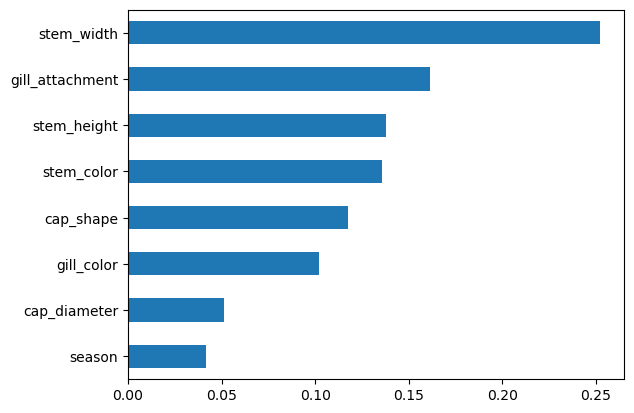

In [59]:
pd.Series(model_gra.feature_importances_, index=X.columns).sort_values().plot(kind="barh")

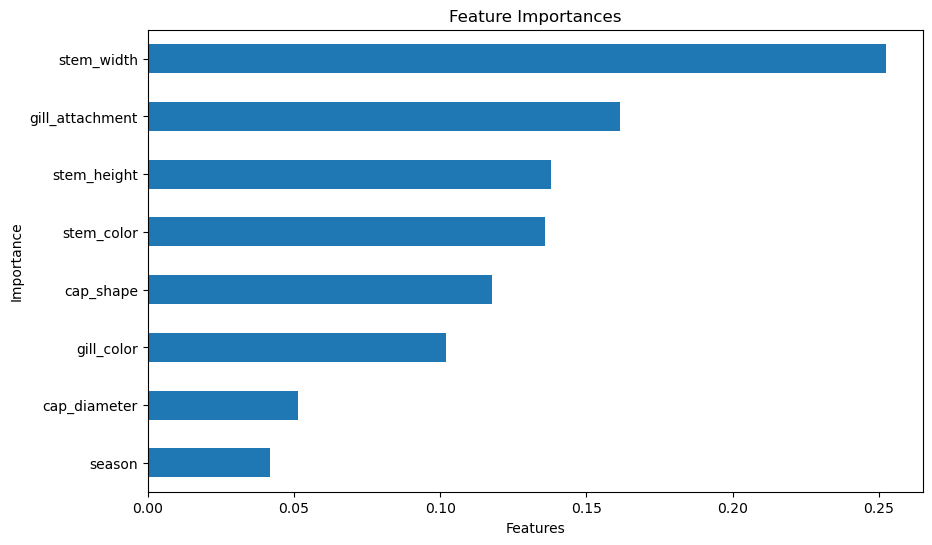

In [44]:
# Step 4: Calculate and display the feature importances

feature_importances = pd.Series(model_gra.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

### Task 5: Exploring Various Parameters in Gradient Boosting Classifier

1. Train a Gradient Boosting model with the following parameters:
    - learning_rate = 0.05
    - n_estimators = 150
    - max_depth=4
    - min_samples_split = 3
    - min_samples_leaf = 2

Learn about these parameters here: [scikit-learn GradientBoostingClassifier Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

-------------------------------------------------------------------------------------------------------------------------------------------------------
2. Evaluate the model using a classification report and print the report.

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
model_grad = GradientBoostingClassifier(learning_rate=0.05,n_estimators=150,max_depth=4,min_samples_split=3,min_samples_leaf=2)
model_grad.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=4, min_samples_leaf=2,
                           min_samples_split=3, n_estimators=150)

In [41]:
y_pred_grad = model_grad.predict(X_test)

In [42]:

report = classification_report(y_test,y_pred_grad)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      6130
           1       0.92      0.90      0.91      7379

    accuracy                           0.90     13509
   macro avg       0.90      0.91      0.90     13509
weighted avg       0.91      0.90      0.90     13509



### Conclusion

In this exercise, we built and evaluated various machine learning models to classify mushrooms as edible or poisonous. Here are the key findings:

1. **Logistic Regression:**
    - Accuracy: 0.62
    - The Logistic Regression model provided a basic level of performance.
<br> </br>
2. **Decision Tree Classifier:**
    - Accuracy: 0.98
    - The Decision Tree Classifier showed significant improvement with an accuracy of 0.98.
<br> </br>
3. **Gradient Boosting Classifier:**
    - Accuracy with Default Parameters: 0.88
    - Accuracy with Custom Parameters: 0.90
    - The Gradient Boosting Classifier achieved an accuracy of 0.88 with default parameters and improved to 0.90 with custom parameters.
<br> </br>

Overall, the Decision Tree Classifier and the Gradient Boosting model with custom parameters both demonstrated strong performance, with the Gradient Boosting model showing a slight improvement with parameter tuning.